In [7]:
#ex1 a
t,k,x0=var('t,k,x0')
x=function('x')(t)
deq = diff(x,t)==-k*x
f(t,k,x0)=desolve(deq,[x,t], ics=[0,x0])
show(f(t,k,x0))


x0*e^(-k*t)

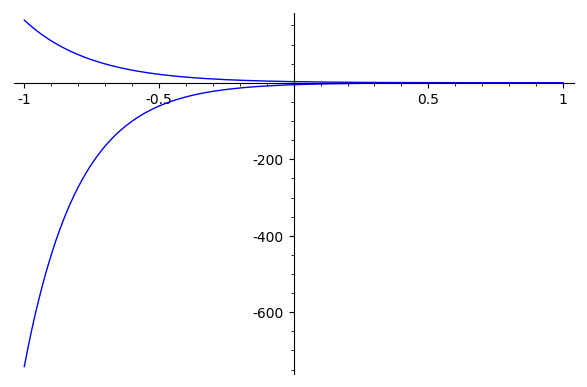

In [8]:
#b
g1=plot(sol.subs(x0==3,k==4))
g2=plot(sol.subs(x0==-5,k==5))
show(g1+g2)

In [9]:
#1c
T12=var('T12')
ec=f(T12,k,x0)==x0/2
[s1]=solve(ec,k)
show([s1])
k(T12)=s1.rhs()
k(T12)


[k == log(2)/T12]

log(2)/T12

In [10]:
k(5730)

1/5730*log(2)

In [11]:
numerical_approx(k(5730))

0.000120968094338559

In [41]:
#1d
t,k,x0=var('t,k,x0')
x=function('x')(t)
deq = diff(x,t)==-k*x
f(t,k,x0)=desolve(deq,[x,t], ics=[0,x0])
assume(t,'real')
ec2=f(t,0.00012,1)==0.2
[s2]=solve(ec2, t)
show([s2])
t1=s2.rhs()
show(t1)
numerical_approx(t1)

[t == 25000/3*log(5)]

25000/3*log(5)

13411.9826036175

In [45]:
#1e
reset()
t,k,x0=var('t,k,x0')
x=function('x')(t)
deq = diff(x,t)==-k*x
f(t,k,x0)=desolve(deq,[x,t], ics=[0,x0])
assume(t,'real')
ec3=f(t,0.00012,1)==0.9157
[s3]=solve(ec3, t)
show([s3])
t1=s3.rhs()
show(t1)
p1=numerical_approx(t1)
s=1988-p1
show(s)

[t == 25000*log(10/9157*9157^(2/3)*10^(1/3))]

25000*log(10/9157*9157^(2/3)*10^(1/3))

1254.11267609625

In [46]:
assume(t,'real')
ec4=f(t,0.00012,1)==0.93021
[s4]=solve(ec4, t)
t2=s4.rhs()
show(t2)
p2=numerical_approx(t2)
s=1988-p2
show(s)

25000*log(10/93021*93021^(2/3)*100^(1/3))

1385.12573438617

In [59]:
#2a
reset()
t,k,T0,Tm=var('t,k,T0,Tm')
T=function('T')(t)
deq = diff(T,t)==-k*(T-Tm)
f(t,k,T0,Tm)=desolve(deq, [T,t], [0,T0])
show(f(t,k,T0,Tm))


(Tm*e^(k*t) + T0 - Tm)*e^(-k*t)

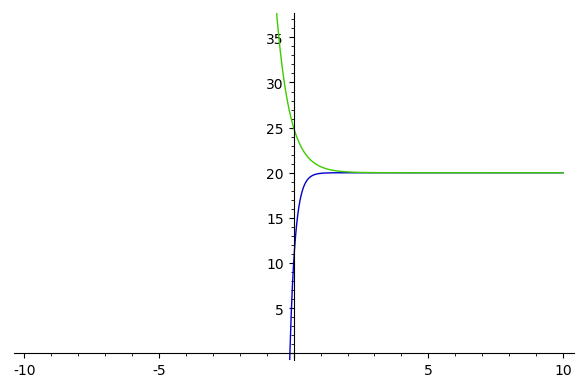

In [67]:
plot([f(t,5,10, 20),f(t,2,25,20)],t,-10,10,ymin=0,ymax=37)


In [68]:
#2c
eq1=f(1,k,34.22,21)==34.11
[s1]=solve(eq1,k)
show([s1])
k1=s1.rhs()
k1


[k == log(1322/1311)]

log(1322/1311)

In [71]:
eq2=f(Tm,k1,36,21)==34.22
[s2]=solve(eq2,Tm)
s2

1322^Tm == 750/661*1311^Tm

In [72]:
find_root(eq2,0,24)

15.118043520273078

In [1]:
#3 Malthus model
# t -timpul (ani)
# x0 - val initiala a populatiei
# r - rata de crestere a populatiei
reset()
t,r,x0,K,r0=var('t,r,x0,K,r0')
x=function('x')(t)
deqM=diff(x,t)==r*x
sM(t,x0,r)=desolve(deqM,[x,t],[0,x0])
show(sM(t,x0,r))


x0*e^(r*t)

In [3]:
# K - rata de crestere logistica a populatiei (Verhulst)(const de suport a mediului)
# r0 - rata de crestere nerestrictiva (Verhulst)
# x0 - valoarea initiala a populatiei
deqV=diff(x,t)==r0*x*(1-x/K)
sV1=desolve(deqV,[x,t],[0,x0])
show(solve(sV1,x))

[log(x(t)) == r0*t - log(-K + x0) + log(-K + x(t)) + log(x0)]

In [5]:
eq1=sV1.log_simplify()
[sV2]=solve(eq1,x)
show([sV2])
sV(t,x0,r0,K)=sV2.rhs()
show(sV(t,x0,r0,K))

[x(t) == K*x0*e^(r0*t)/(x0*(e^(r0*t) - 1) + K)]

K*x0*e^(r0*t)/(x0*(e^(r0*t) - 1) + K)

In [6]:
#c
popUS=[9.6,12.9,17.1,23.2,31.4,38.6,50.2,62.9,76,92,106.5,123.2]
popUS

[9.60000000000000,
 12.9000000000000,
 17.1000000000000,
 23.2000000000000,
 31.4000000000000,
 38.6000000000000,
 50.2000000000000,
 62.9000000000000,
 76,
 92,
 106.500000000000,
 123.200000000000]

In [8]:
list_points=[(10*i,popUS[i]) for i in [0..11]]
list_points

[(0, 9.60000000000000),
 (10, 12.9000000000000),
 (20, 17.1000000000000),
 (30, 23.2000000000000),
 (40, 31.4000000000000),
 (50, 38.6000000000000),
 (60, 50.2000000000000),
 (70, 62.9000000000000),
 (80, 76),
 (90, 92),
 (100, 106.500000000000),
 (110, 123.200000000000)]

In [9]:
#(c)
assume(r,'real')
# t - timpul (ani)
# x0 - valoarea initiala a populatiei
# r - rata de crestere a populatiei (Malthus)
# sM(t,x0,r)
eq=sM(10,popUS[0],r)==popUS[1]
[r1]=solve(eq,r)
r2=r1.rhs()
show(r2)


log(1/2*43^(1/10)*sqrt(2))

In [11]:
r=numerical_approx(r2)
r

0.0295464212893835

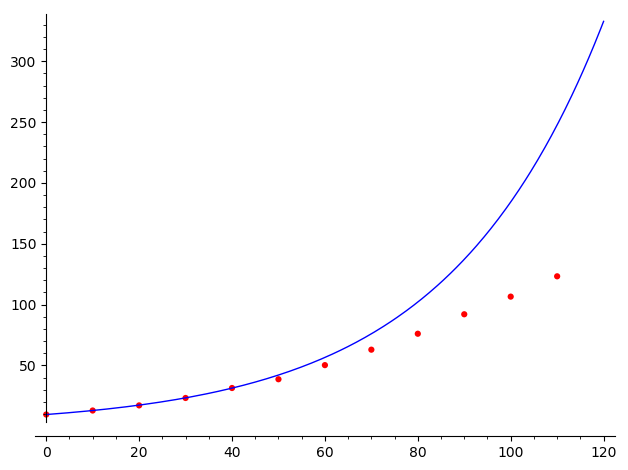

In [12]:
g1=list_plot(list_points,pointsize=20,color='red')
g2=plot(sM(t,popUS[0],r),t,0,120)
g=g1+g2
show(g)

In [14]:
#(d)
assume(r0,'real')
assume(K,'real')
# K - rata de crestere logistica a populatiei(Verhulst)(const de suport a mediului)
# r0 - rata de crestere nerestrictiva(Verhulst)
# x0 - valoarea initiala a populatiei
# t - timpul
# sV(t,x0,r0,K)
eq1=sV(10,popUS[0],r0,K)==popUS[1]
eq2=sV(20,popUS[0],r0,K)==popUS[2]
s=solve([eq1,eq2],r0,K)
show(s)

[9.6*K*e^(10*r0)/(K + 9.6*e^(10*r0) - 9.6) == 12.9, 9.6*K*e^(20*r0)/(K + 9.6*e^(20*r0) - 9.6) == 17.1]

In [15]:
K1=solve(eq1,K)[0].rhs()
show(K1)

2064/5*(e^(10*r0) - 1)/(32*e^(10*r0) - 43)

In [16]:
eq3=eq2.substitute(K==K1)
eq3

19814.4000000000*(e^(10*r0) - 1)*e^(20*r0)/((2064*(e^(10*r0) - 1)/(32*e^(10*r0) - 43) + 48.0000000000000*e^(20*r0) - 48.0000000000000)*(32*e^(10*r0) - 43)) == 17.1000000000000

In [17]:
simplify(eq3)

(19814.4*e^(10*r0) - 19814.4)*e^(20*r0)/((2064*(e^(10*r0) - 1)/(32*e^(10*r0) - 43) + 47.99999999999999*e^(20*r0) - 47.99999999999999)*(32*e^(10*r0) - 43)) == 17.1

In [18]:
solve(eq3,r0)

[r0 == log(1/56*627^(1/10)*8^(4/5)*7^(9/10))]

In [19]:
r00=solve(eq3,r0)[0].rhs()
show(r00)

log(1/56*627^(1/10)*8^(4/5)*7^(9/10))

In [20]:
eq22=eq2.substitute(r0==r00)
solve(eq22,K)

[K == (23091/250)]

In [21]:
KK=solve(eq22,K)[0].rhs()
KK

23091/250

In [22]:
numerical_approx(KK)

92.3640000000000